Remmeber to change runtime to GPU , have fun using OmMariamFlow

In [7]:
!pip install OmMariamFlow

In [8]:
import cupy as cp

In [9]:

from OmMariamFlow.OmMariamFlow import *


In [10]:
train_path = 'sample_data/mnist_train_small.csv'

In [11]:
#load the csv
img_data = Image(path = train_path,test_frac = 0.5,val_frac = 0.45,image_size=(28,28), colour = 'gray')

In [16]:
#get trainning data
train_data = img_data.train_data
train_labels = img_data.train_labels

test_data = img_data.train_data
test_labels = img_data.train_labels

In [13]:
#define the model
Layer1 = Conv(X = np.array(train_data),in_channels = 1, out_channels = 2, kernel_size=8, stride=1, padding= 2  , Activation_fn = 'relu')
Layer2 = MaxPool(Layer1.output(),kernel_size=3, stride=1, padding=0)
Layer3 = Flatten(Layer2.output())
Layer4 = Linear(Input_Matrix = Layer3.output().T,Output_Dimension = 500,Activation_fn = 'relu')
Layer5 = Linear(Input_Matrix = Layer4.output(),Output_Dimension = 10,Activation_fn = 'softmax')
my_Model = Model([Layer1,Layer2,Layer3,Layer4,Layer5])
my_Loss = my_Model.Loss(np.array(train_labels), Layer5.output()).CrossEntropy()


 Loss : 0.10886677771482842
accuracy  :  0.14614614614614616

 Loss : 2.3559103378331887
accuracy  :  0.0

 Loss : 2.260161094286925
accuracy  :  0.16016016016016016

 Loss : 2.2172197617303167
accuracy  :  0.2122122122122122

 Loss : 2.182126370726085
accuracy  :  0.2552552552552553

 Loss : 2.1493853231431914
accuracy  :  0.2752752752752753

 Loss : 2.118003783698437
accuracy  :  0.3123123123123123

 Loss : 2.087725040109705
accuracy  :  0.3353353353353353

 Loss : 2.058289237271979
accuracy  :  0.36036036036036034

 Loss : 2.0295500116953034
accuracy  :  0.3783783783783784

 Loss : 2.0014653970064447
accuracy  :  0.4014014014014014

 Loss : 1.9740257867703546
accuracy  :  0.42042042042042044

 Loss : 1.947222224390422
accuracy  :  0.44544544544544545

 Loss : 1.9210435240706252
accuracy  :  0.46346346346346345

 Loss : 1.8954782287155933
accuracy  :  0.4804804804804805

 Loss : 1.8705149542258293
accuracy  :  0.4954954954954955

 Loss : 1.8461420621497424
accuracy  :  0.51551551551

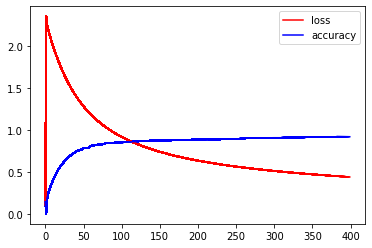

In [14]:
#parameters
learning_rate = 0.065
training_epochs = 400
epsilon = 0.01
#train and visualize
opt = my_Model.Optimization(training_epochs, my_Loss, learning_rate, epsilon).GradientDescent()

In [20]:
#inference the model

y_hat = my_Model.inference(Test_Inputs = cp.array(test_data))

y_hat = np.argmax(y_hat, axis = 0)

2


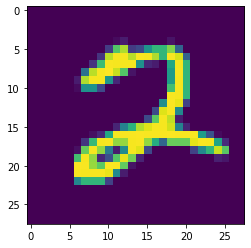

In [45]:
#see what the model has learned

test_id = 454

print(y_hat[test_id])
img =  train2img(train_data[test_id,:,:,:]).reshape((28,28))
plt.imshow(img)

In [46]:
#save the model

Utils = Model_Utils()
Utils.save(my_Model,'MNIST-Conv')


In [47]:
#load the model

loaded_Model = Utils.load('MNIST-Conv')